<a href="https://colab.research.google.com/github/NikhilGupta963/Car-Prices-Prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!gdown 13J3eKouVFjXGwPCdqjnmLtON9JJA7kNq

Downloading...
From: https://drive.google.com/uc?id=13J3eKouVFjXGwPCdqjnmLtON9JJA7kNq
To: /content/cars24-car-price.csv
100% 1.79M/1.79M [00:00<00:00, 15.3MB/s]


In [ ]:
df = pd.read_csv("cars24-car-price.csv")
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19980 non-null  object 
 1   selling_price      19980 non-null  float64
 2   year               19980 non-null  float64
 3   seller_type        19980 non-null  object 
 4   km_driven          19980 non-null  int64  
 5   fuel_type          19980 non-null  object 
 6   transmission_type  19980 non-null  object 
 7   mileage            19980 non-null  float64
 8   engine             19980 non-null  float64
 9   max_power          19980 non-null  float64
 10  seats              19980 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,19980.000000,19980.000000,1.998000e+04,19980.000000,19980.000000,19980.000000,19980.000000
mean,7.392066,2014.525125,5.824488e+04,19.347219,1476.327401,97.854443,5.317868
std,9.103088,3.249185,5.172509e+04,4.620053,520.449398,45.080670,0.835370
min,0.250000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.116425e+04,16.800000,1197.000000,73.900000,5.000000
50%,5.200000,2015.000000,5.200000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


In [ ]:
df.shape

(19980, 11)

<Axes: >

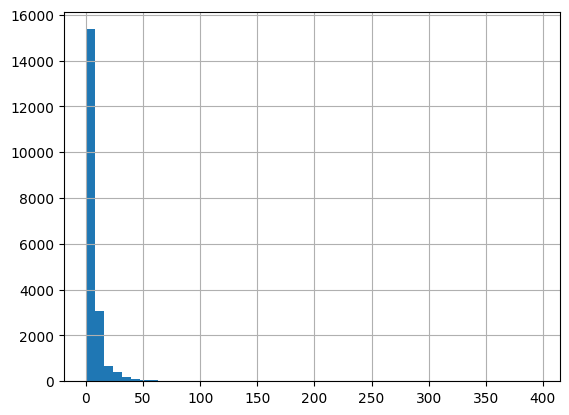

In [ ]:
df['selling_price'].hist(bins=50)

Checking the percentage of selling price are more that 100 lakhs

In [ ]:
(df.loc[df.selling_price > 100].shape[0] / df.shape[0]) * 100

0.055055055055055056

In [ ]:
df.loc[df.selling_price > 100, 'selling_price'] = 100

<Axes: >

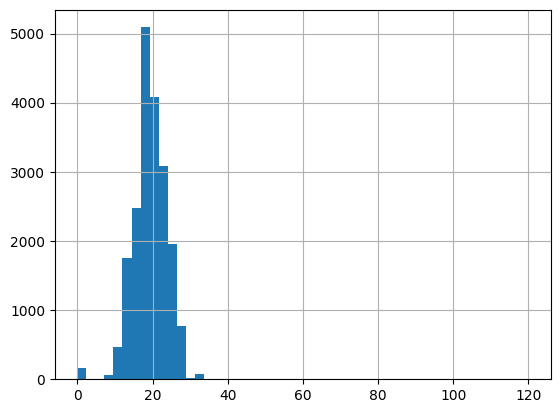

In [ ]:
df['mileage'].hist(bins=50)

<Axes: ylabel='Density'>

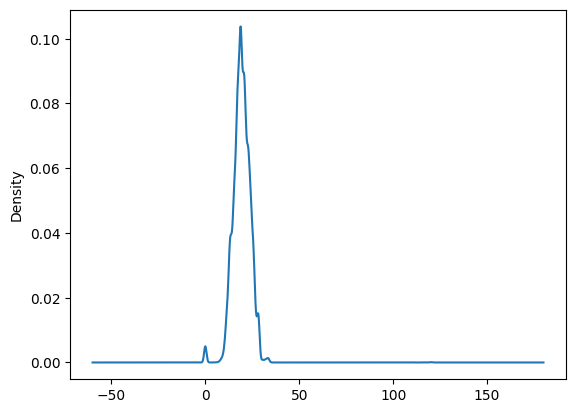

In [ ]:
df['mileage'].plot.density()

In [ ]:
df[df['mileage'] < 5].mileage.describe()

,mileage
count,161.000000
mean,0.024845
std,0.315244
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


In [ ]:
(df.loc[df.mileage == 0].shape[0] / df.shape[0]) * 100

0.8008008008008007

In [ ]:
df[df.mileage == 0].shape

(160, 11)

In [ ]:
df[df.mileage > 40]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
11966,Mahindra e2oPlus P6,4.00,2018.0,Dealer,26000,Electric,Automatic,110.0,1476.327401,25.4,4.0
15684,Mahindra e2o T2,3.60,2015.0,Dealer,42862,Electric,Automatic,120.0,0.000000,25.5,5.0
17782,Mahindra e2o T2,4.50,2015.0,Dealer,40000,Electric,Automatic,120.0,0.000000,25.5,5.0
18401,Mahindra e2o Premium,3.25,2013.0,Individual,50000,Electric,Automatic,120.0,0.000000,25.5,5.0


In [ ]:
df[df.mileage > 40].fuel_type.value_counts()

,count
fuel_type,
Electric,4


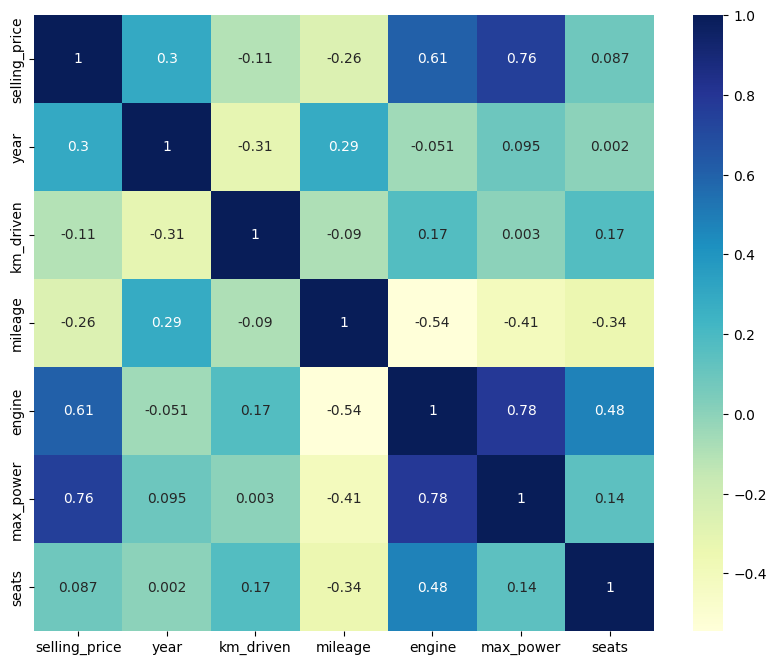

In [ ]:
numerical_features = df[['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

plt.figure(figsize=(10,8))
ax = sns.heatmap(numerical_features.corr(), cmap="YlGnBu", annot=True)

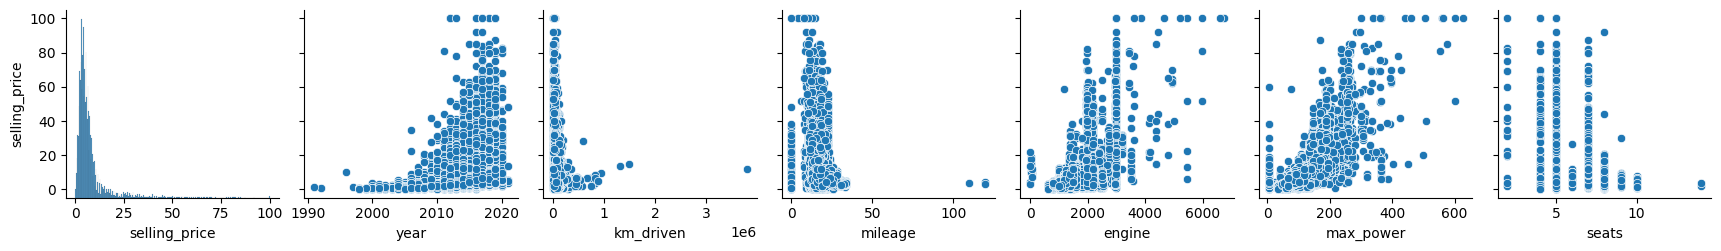

In [ ]:
sns.pairplot(df, y_vars='selling_price')

# Categorical Features

In [ ]:
df["make"] = df.full_name.apply(lambda x : x.split()[0])
df["model"] = df.full_name.apply(lambda x : " ".join(x.split()[1:]))
df = df.drop("full_name", axis=1)
df.head(2)

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,1.2,2012.0,Individual,120000,Petrol,Manual,19.7,796.0,46.3,5.0,Maruti,Alto Std
1,5.5,2016.0,Individual,20000,Petrol,Manual,18.9,1197.0,82.0,5.0,Hyundai,Grand i10 Asta


In [ ]:
df.describe(include='object')

,seller_type,fuel_type,transmission_type,make,model
count,19980,19980,19980,19980,19980
unique,3,5,2,42,3321
top,Dealer,Diesel,Manual,Maruti,Swift Dzire VDI
freq,11973,9817,16029,5650,210


In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Dealer,11973
Individual,7817
Trustmark Dealer,190


In [ ]:
df['fuel_type'].value_counts()

,count
fuel_type,
Diesel,9817
Petrol,9767
CNG,316
LPG,66
Electric,14


In [ ]:
df['transmission_type'].value_counts()

,count
transmission_type,
Manual,16029
Automatic,3951


In [ ]:
df['make'].value_counts()

,count
make,
Maruti,5650
Hyundai,3646
Honda,1781
Mahindra,1291
Toyota,1205
Tata,975
Ford,908
Volkswagen,762
Renault,636


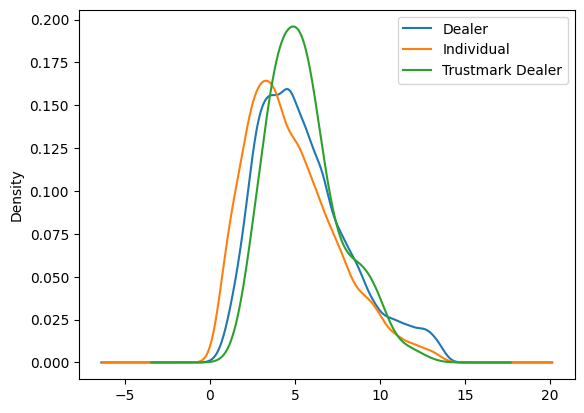

In [ ]:
df.loc[df.selling_price <= df.selling_price.quantile(0.9)].groupby('seller_type')['selling_price'].plot.density()
plt.legend()

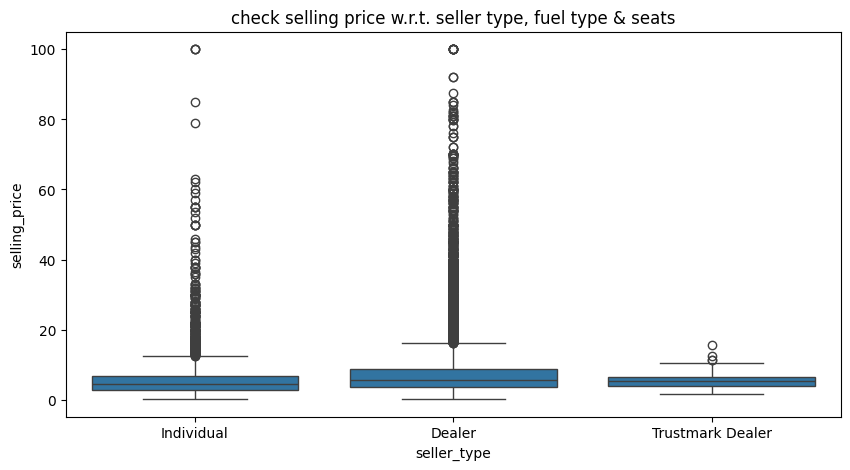

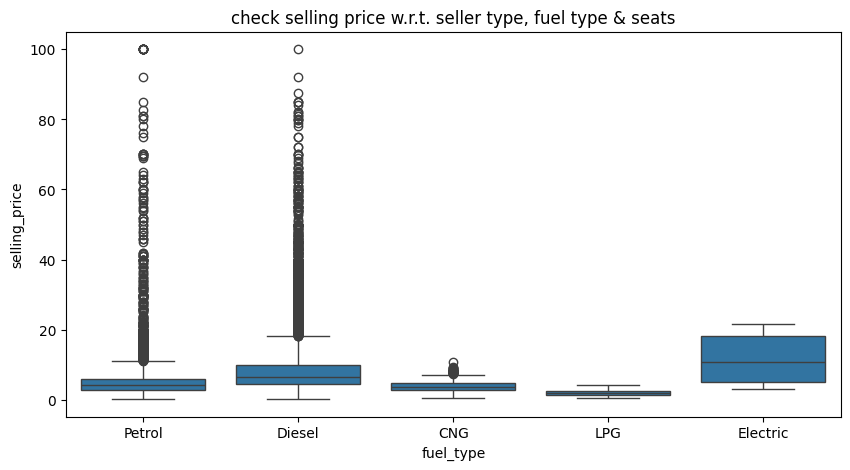

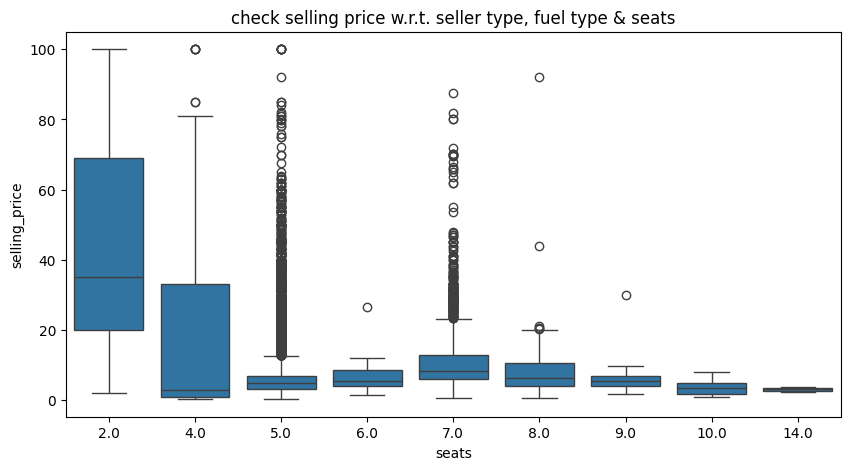

In [ ]:
for col in ['seller_type', 'fuel_type', 'seats']:
  plt.figure(figsize = (10,5))
  sns.boxplot(y='selling_price', x=col, data=df)
  plt.title('check selling price w.r.t. seller type, fuel type & seats')
  plt.show()

converting selling price to log selling price for better visualization (scaling)

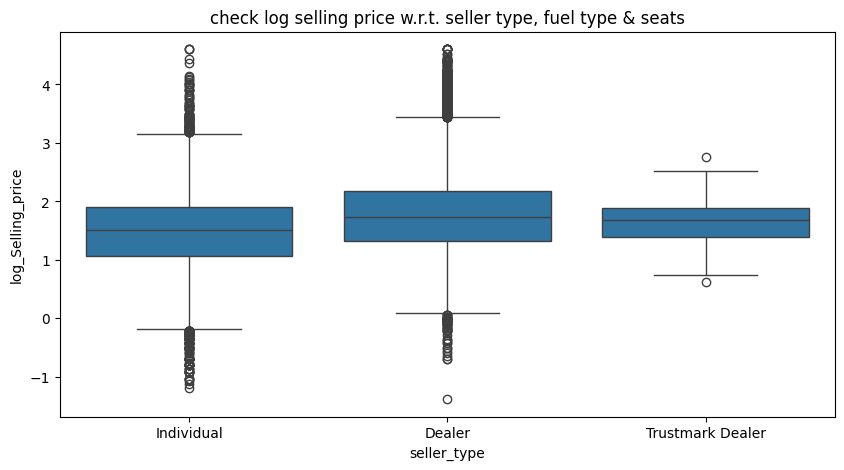

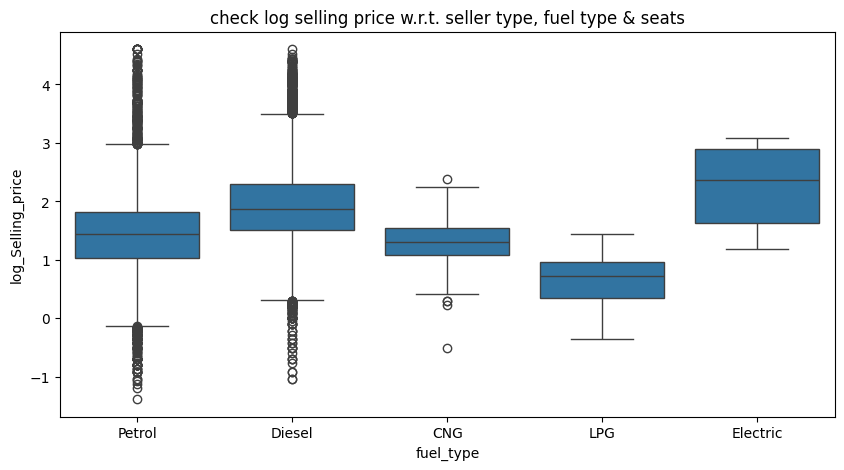

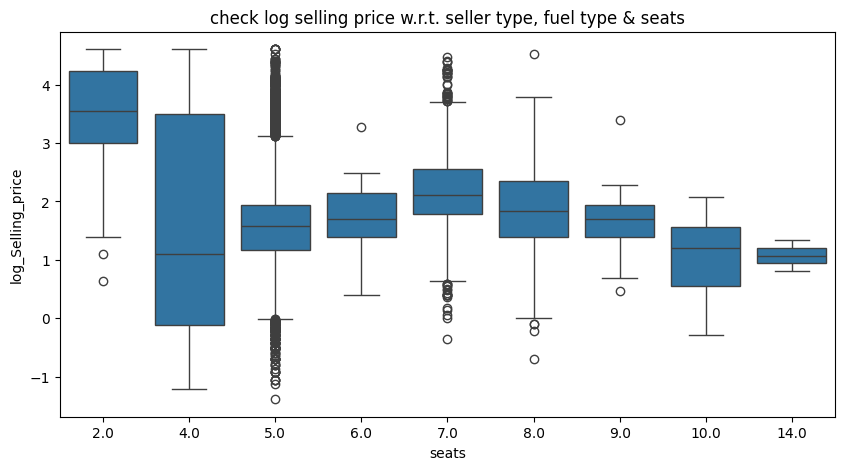

In [ ]:
df['log_Selling_price'] = np.log(df['selling_price'].values)

for col in ['seller_type', 'fuel_type', 'seats']:
  plt.figure(figsize = (10,5))
  sns.boxplot(y='log_Selling_price', x=col, data=df)
  plt.title('check log selling price w.r.t. seller type, fuel type & seats')
  plt.show()

In [ ]:
# check how many type of make are there
df['make'].nunique()

42

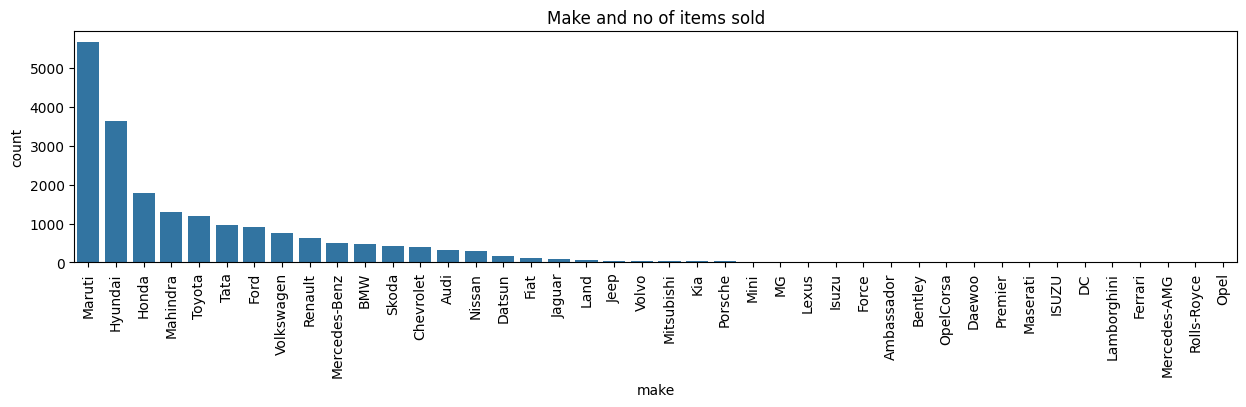

In [ ]:
plt.figure(figsize=(15,3))
sns.countplot(x='make', data=df, order=df['make'].value_counts().index)
plt.xticks(rotation=90);
plt.title("Make and no of items sold")
plt.show()

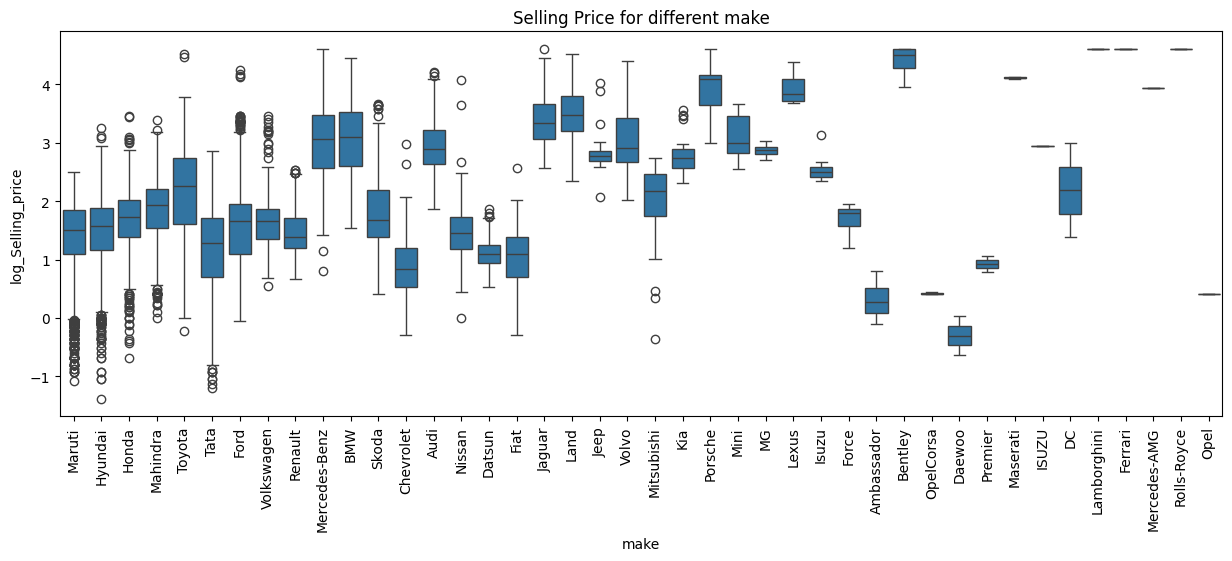

In [ ]:
# lets check how make is related to the selling price (we will be using log_selling_price for better visualization)
plt.figure(figsize=(15,5))
sns.boxplot(y='log_Selling_price',x='make', data=df, order = df['make'].value_counts().index)
plt.xticks(rotation=90);
plt.title("Selling Price for different make")
plt.show()

In [ ]:
df.drop('log_Selling_price', axis=1, inplace=True)

### Feature Engineering

In [ ]:
df.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti,Alto Std
1,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai,Grand i10 Asta
2,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai,i20 Asta
3,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti,Alto K10 2010-2014 VXI
4,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV


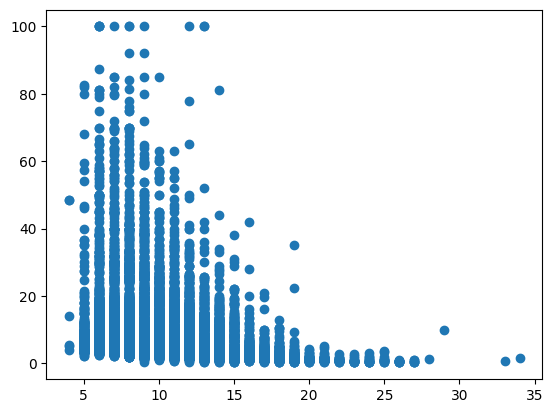

In [ ]:
from datetime import datetime

current_year = datetime.now().year
age = current_year - df['year']
plt.scatter(age, df.selling_price)



*   Hence less the year more is the selling price



####encoding for categorical variables

For transmission type there are only 2 categories so we can encode them as binary (0 or 1)

In [ ]:
# explains how two category variable can be encoded as a binary variable
transmission_dummy = pd.get_dummies(df["transmission_type"])
df = pd.concat([df, transmission_dummy], axis=1)
df = df.drop(["transmission_type", "Automatic"], axis=1)
df = df.rename(columns={"Manual": "transmission_type"})
df.sample(frac=1).head(2)

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,transmission_type
10058,0.57,2010.0,Dealer,81425,Petrol,26.0,624.0,35.0,4.0,Tata,Nano Cx,True
9876,4.25,2016.0,Individual,15000,Petrol,18.9,1197.0,82.0,5.0,Hyundai,Grand i10 Sportz,True


####Encode fuel type

In [ ]:
dummy_fuel_type = pd.get_dummies(df["fuel_type"], prefix="seats")
dummy_fuel_type.sample(frac=1).head(2)

,seats_CNG,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
10138,False,True,False,False,False
530,False,True,False,False,False


In [ ]:
dummy_fuel_type = dummy_fuel_type[dummy_fuel_type.columns[1:]]
dummy_fuel_type.head(2)

,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
0,False,False,False,True
1,False,False,False,True


In [ ]:
pd.concat([df, dummy_fuel_type], axis=1).sample(frac=1).head(2)

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,transmission_type,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
18092,1.35,2007.0,Dealer,49000,Petrol,0.0,1086.0,5.0,5.0,Hyundai,Santro Xing XL,True,False,False,False,True
16593,3.25,2013.0,Dealer,86400,Petrol,18.5,1197.0,85.8,5.0,Maruti,Ritz VXi,True,False,False,False,True


####Encoding "make"

In [ ]:
df.make.nunique()

42

> **INTERACTION**
> - How to handle so many categories?
> **Hint:** Here we have too many categories. We can merge categories as in 'seats' variable or we can try target encoding. Dummy encoding would make too many features with highly diluted information.

Or we can try another technique known as **Target Encoding**


In [ ]:
encoded_make = df.groupby('make')['selling_price'].transform('mean')

In [ ]:
show_df = df[['make']].copy()
show_df['encoded_make'] = encoded_make
show_df = show_df.drop_duplicates()
print(len(show_df))
show_df.head()

42


,make,encoded_make
0,Maruti,4.684721
1,Hyundai,5.374923
4,Ford,6.265275
9,Mahindra,7.303129
10,Tata,4.395415


####Scaling

In [ ]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,19980.000000,19980.000000,1.998000e+04,19980.000000,19980.000000,19980.000000,19980.000000
mean,7.353527,2014.525125,5.824488e+04,19.347219,1476.327401,97.854443,5.317868
std,8.312958,3.249185,5.172509e+04,4.620053,520.449398,45.080670,0.835370
min,0.250000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.116425e+04,16.800000,1197.000000,73.900000,5.000000
50%,5.200000,2015.000000,5.200000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,100.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(df[['selling_price', 'km_driven', 'mileage']])
scaled_values = scaler.transform(df[['selling_price', 'km_driven', 'mileage']])  # returns numpy.ndarray not df.
scaled_df = pd.DataFrame(scaled_values, columns=['selling_price', 'km_driven', 'mileage'])
scaled_df.head()

,selling_price,km_driven,mileage
0,0.009524,0.031553,0.164167
1,0.052632,0.005237,0.157500
2,0.019048,0.015764,0.141667
3,0.020150,0.009711,0.174333
4,0.054637,0.007869,0.189750


####formula to scale teh values

X_scaled = (X_max - Xmin)/(X - X_min)

In [ ]:
# columns to scale
cols = ['selling_price', 'km_driven', 'mileage']
scaled_df_1 = df.copy()
for col in cols:
  col_min = df[col].min()
  col_max = df[col].max()
  scaled_df_1[col] = (df[col] - col_min) / (col_max - col_min)

scaled_df[cols].head()

,selling_price,km_driven,mileage
0,0.009524,0.031553,0.164167
1,0.052632,0.005237,0.157500
2,0.019048,0.015764,0.141667
3,0.020150,0.009711,0.174333
4,0.054637,0.007869,0.189750


In [ ]:
def merge_seats(x):
  if 2 <= x <= 4:
    return "2-4"
  elif x > 5:
    return ">5"
  else:
    return "=5"

def preprocessed_df(df):
  df = df.loc[df.mileage != 0].copy()


In [ ]:
def merge_seats(x):
    if 2 <= x <= 4:
        return '2-4'
    elif x > 5:
        return '>5'
    else:
        return '5'

def preprocess(df):
    df = df.loc[df.mileage != 0].copy()
    outlier_theshold = df.selling_price.quantile(0.95)
    df.loc[df.selling_price > outlier_theshold, 'selling_price'] = outlier_theshold
    df['age'] = pd.to_datetime('now', utc=True).date().year - df['year']
    df['full_name'] = df['full_name'].str.upper()
    df['seats'] = df['seats'].apply(merge_seats)
    df.drop(columns=['year'])
    return df

def feature_engineering(df):
    df['make'] = df.full_name.apply(lambda x : x.split()[0])
    df['model'] = df.full_name.apply(lambda x : " ".join(x.split()[1:]))
    one_hot_encode_cols = ['seller_type', 'fuel_type', 'transmission_type', 'seats']
    for column in one_hot_encode_cols:
        df = pd.concat([df, pd.get_dummies(df[column]).iloc[: , 1:]], axis=1)
    df.drop(columns=one_hot_encode_cols + ['full_name'], inplace=True)
    df['make'] = df.groupby('make')['selling_price'].transform('median')
    df['model'] = df.groupby('model')['selling_price'].transform('median')
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df

In [ ]:
df.head()

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,transmission_type
0,1.20,2012.0,Individual,120000,Petrol,19.70,796.0,46.30,5.0,Maruti,Alto Std,True
1,5.50,2016.0,Individual,20000,Petrol,18.90,1197.0,82.00,5.0,Hyundai,Grand i10 Asta,True
2,2.15,2010.0,Individual,60000,Petrol,17.00,1197.0,80.00,5.0,Hyundai,i20 Asta,True
3,2.26,2012.0,Individual,37000,Petrol,20.92,998.0,67.10,5.0,Maruti,Alto K10 2010-2014 VXI,True
4,5.70,2015.0,Dealer,30000,Diesel,22.77,1498.0,98.59,5.0,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV,True


In [ ]:
df = pd.read_csv("cars24-car-price.csv")
df = preprocess(df)
df = feature_engineering(df)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.184371,0.042522,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.207231,0.225975,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.207231,0.120277,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.184371,0.093549,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.224624,0.300085,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


<Axes: >

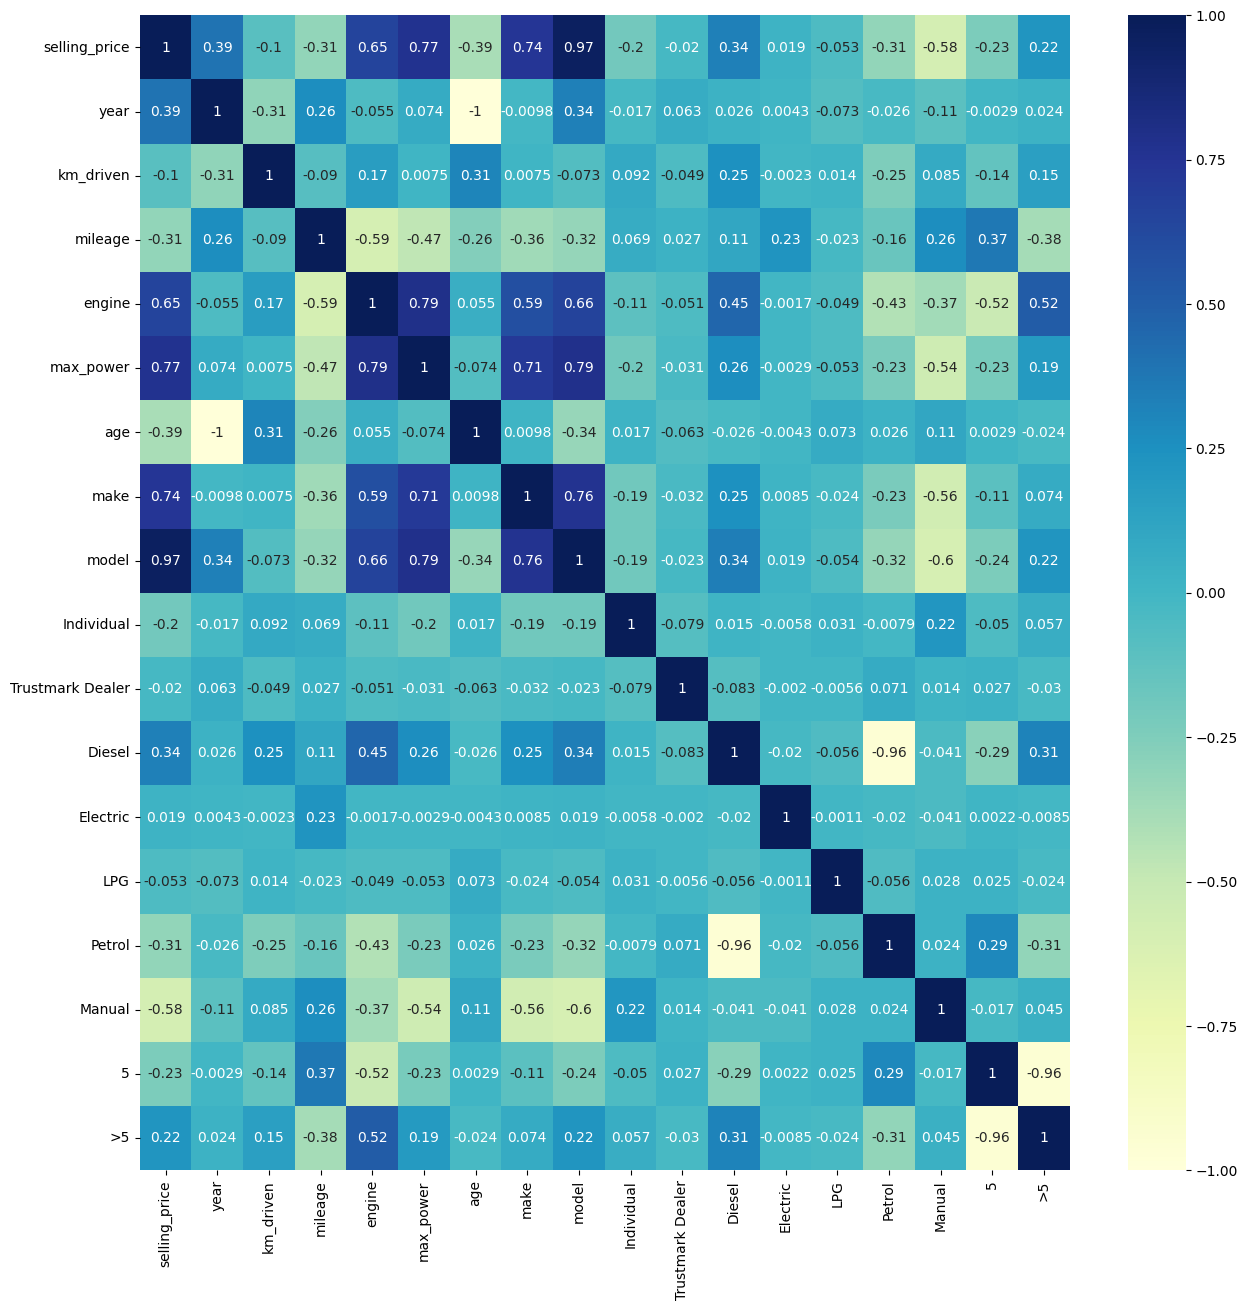

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Linear Regression Implementation from scratch(without libraries)

In [ ]:
# Train/test split
X = df.drop(columns='selling_price').values
y = df.selling_price.values.reshape(-1,1)

# manual train test split(80/20)
np.random.seed=(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [ ]:
# add bias term
def add_bias(X):
  ones = np.ones((X.shape[0], 1))
  return np.hstack((ones, X))

X_train = add_bias(X_train)
X_test = add_bias(X_test)

In [ ]:
# Define the Model (Hypothesis Function)
def predict(X, weights):
    return X @ weights   # @ ---> matrix multiplication

In [ ]:
# calculate loss function (Mean squared error)
def loss_fn(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

In [ ]:
# Gradient Descent
def gradient_descent(X, y, lr=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros((n_features, 1))
    loss_history = []

    for epoch in range(epochs):
        y_pred = X @ weights
        loss = loss_fn(y, y_pred)

        # STOP if NaN appears
        if np.isnan(loss):
            print(f"NaN encountered at epoch {epoch}")
            break

        loss_history.append(loss)

        gradient = (-2 / n_samples) * X.T @ (y - y_pred)
        weights -= lr * gradient

    return weights, loss_history


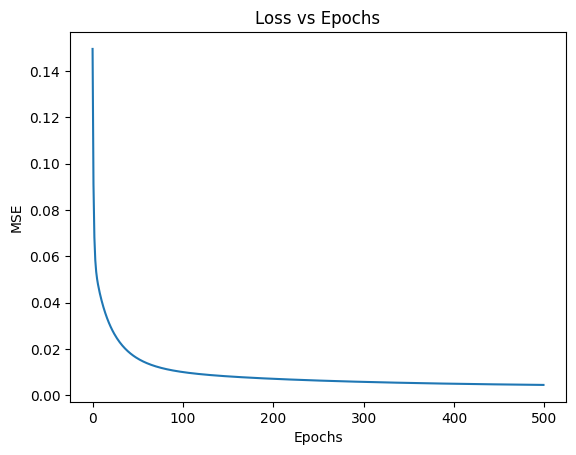

In [ ]:
weights, losses = gradient_descent(X_train, y_train, lr=0.05, epochs=500)

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Loss vs Epochs")
plt.show()


In [ ]:
# model evaluation
y_pred_train = predict(X_train, weights)
y_pred_test = predict(X_test, weights)


print("Train MSE:", loss_fn(y_train, y_pred_train))
print("Test MSE :", loss_fn(y_test, y_pred_test))

Train MSE: 0.004545636722908863
Test MSE : 0.004409713057543157


In [ ]:
# finding the best hyperparameter for our regression
learning_rates = [0.001, 0.01, 0.05, 1]
epoch_list = [500, 1000, 1500]

best_loss = float('inf')
best_params = None

for lr in learning_rates:
  for epochs in epoch_list:
    weights, _ = gradient_descent(X_train, y_train, lr, epochs)
    val_loss = loss_fn(y_test, predict(X_test, weights))

    if val_loss < best_loss:
      best_loss = val_loss
      best_params = (lr, epochs)


print("Best params:", best_params)
print("Best Test MSE:", best_loss)

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-3297974273.py:3: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred)**2)
/tmp/ipython-input-4178948030.py:8: RuntimeWarning: overflow encountered in matmul
  y_pred = X @ weights
/tmp/ipython-input-4178948030.py:18: RuntimeWarning: invalid value encountered in matmul
  gradient = (-2 / n_samples) * X.T @ (y - y_pred)
/tmp/ipython-input-4178948030.py:8: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ weights
/tmp/ipython-input-642869806.py:3: RuntimeWarning: invalid value encountered in matmul
  return X @ weights   # @ ---> matrix multiplication


NaN encountered at epoch 369
NaN encountered at epoch 369
NaN encountered at epoch 369
Best params: (0.05, 1500)
Best Test MSE: 0.003258287254755037


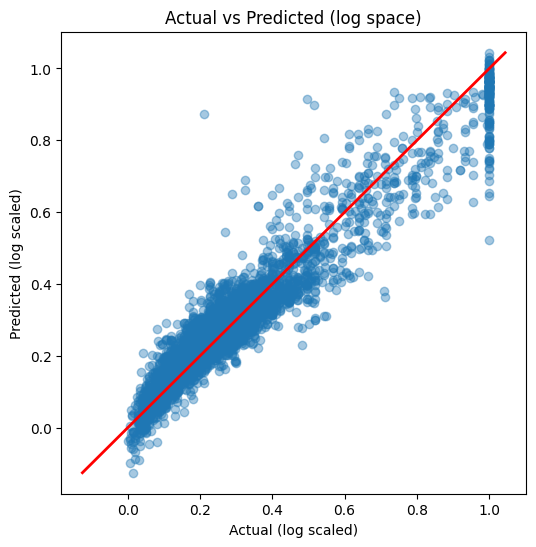

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.4)

# perfect prediction line (RED)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

plt.xlabel("Actual (log scaled)")
plt.ylabel("Predicted (log scaled)")
plt.title("Actual vs Predicted (log space)")
plt.show()


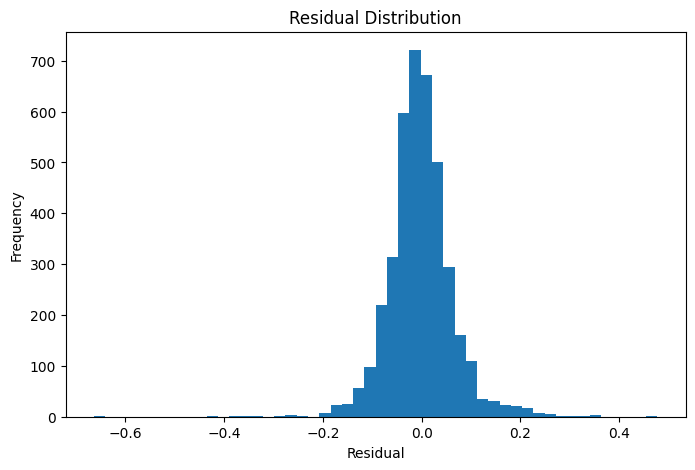

In [ ]:
residuals = y_test - y_pred_test

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


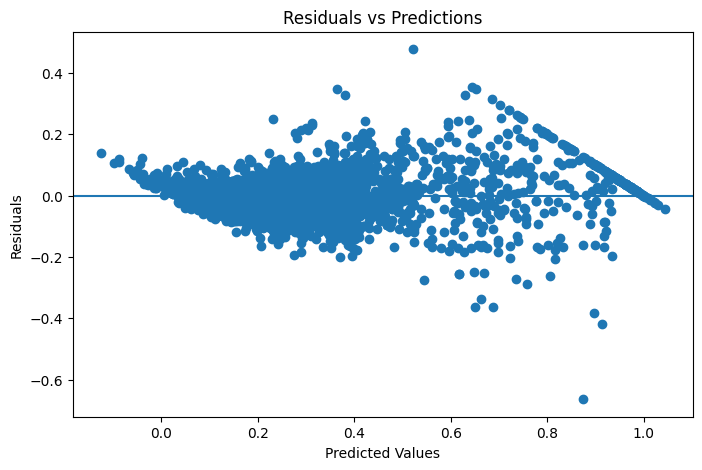

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred_test, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()


# implemention linear regression using sklearn libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

sk_model = LinearRegression(fit_intercept=False)
# fit_intercept=False because we already added bias manually

sk_model.fit(X_train, y_train)

sk_y_pred_train = sk_model.predict(X_train)
sk_y_pred_test = sk_model.predict(X_test)

#### comparing both model results

In [ ]:
print("---------------------------SCRATCH MODEL---------------------------")
print("Train MSE:", loss_fn(y_train, y_pred_train))
print("Test  MSE:", loss_fn(y_test, y_pred_test))
print("Train R2 :", r2_score(y_train, y_pred_train))
print("Test  R2 :", r2_score(y_test, y_pred_test))

print("---------------------------SKLEARN MODEL---------------------------")
print("Train MSE:", mean_squared_error(y_train, sk_y_pred_train))
print("Test  MSE:", mean_squared_error(y_test, sk_y_pred_test))
print("Train R2 :", r2_score(y_train, sk_y_pred_train))
print("Test  R2 :", r2_score(y_test, sk_y_pred_test))

---------------------------SCRATCH MODEL---------------------------
Train MSE: 0.004545636722908863
Test  MSE: 0.004409713057543157
Train R2 : 0.9184509285812952
Test  R2 : 0.9180013619082509
---------------------------SKLEARN MODEL---------------------------
Train MSE: 0.003241790539156846
Test  MSE: 0.0030392516889942403
Train R2 : 0.9418420291111584
Test  R2 : 0.9434850984489171


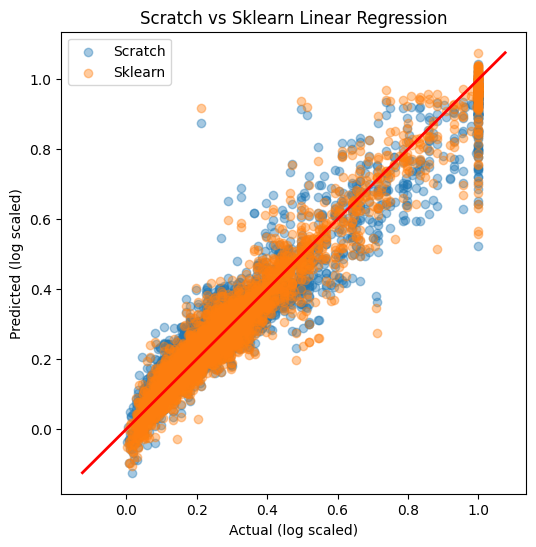

In [ ]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred_test, alpha=0.4, label="Scratch")
plt.scatter(y_test, sk_y_pred_test, alpha=0.4, label="Sklearn")

min_val = min(y_test.min(), y_pred_test.min(), sk_y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max(), sk_y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

plt.xlabel("Actual (log scaled)")
plt.ylabel("Predicted (log scaled)")
plt.title("Scratch vs Sklearn Linear Regression")
plt.legend()
plt.show()
